In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"data\bank_data\train.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

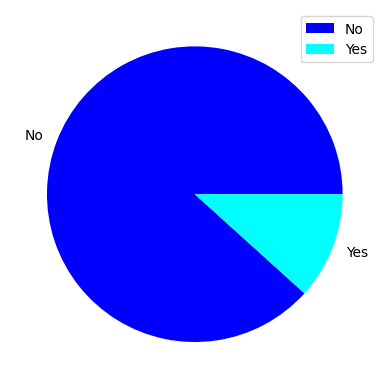

In [6]:
y = data['y'].value_counts()
plt.pie(x=y, labels=['No', 'Yes'], colors=['blue', 'cyan'])
plt.legend()
plt.show()

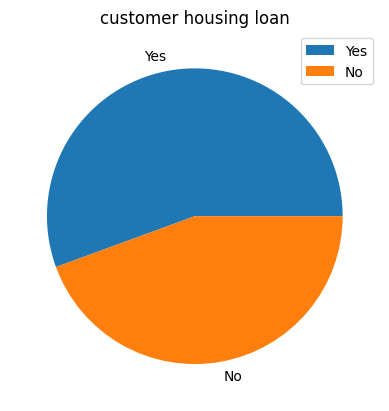

In [7]:
housing = data['housing'].value_counts()
plt.pie(housing, labels=['Yes', 'No'])
plt.title("customer housing loan")
plt.legend()
plt.show()

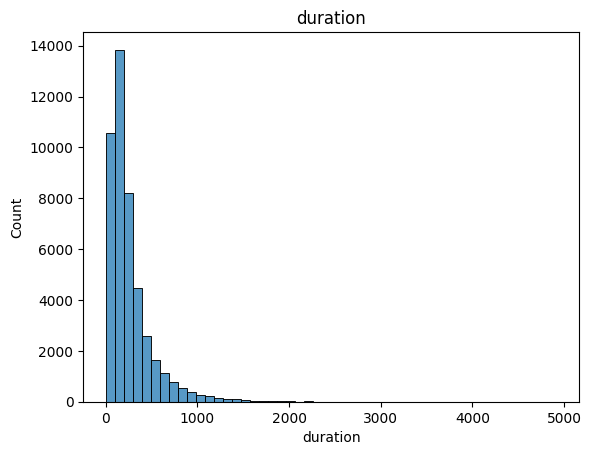

In [8]:
during = sns.histplot(x=data['duration'],
                      bins=50)
plt.title('duration')
plt.show()

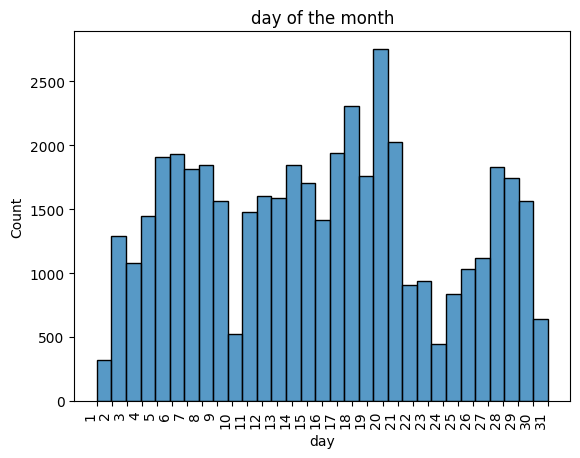

In [9]:
day = sns.histplot(x=data['day'],
                   bins=31, kde=False)
plt.xticks(range(1, 32))
plt.title('day of the month')
day.set_xticklabels(day.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

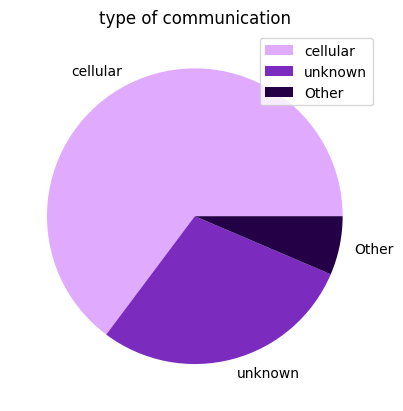

In [10]:
contact = plt.pie(x=data['contact'].value_counts(), labels=['cellular', 'unknown', 'Other'],
                  colors=['#e0aaff', '#7b2cbf', '#240046'])
plt.title('type of communication')
plt.legend()

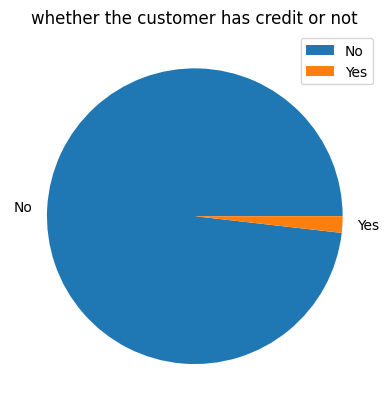

In [11]:
plt.pie(x=data['default'].value_counts(), labels=['No', 'Yes'])
plt.legend()
plt.title('whether the customer has credit or not')
plt.show()

Text(0, 0.5, 'count of customer')

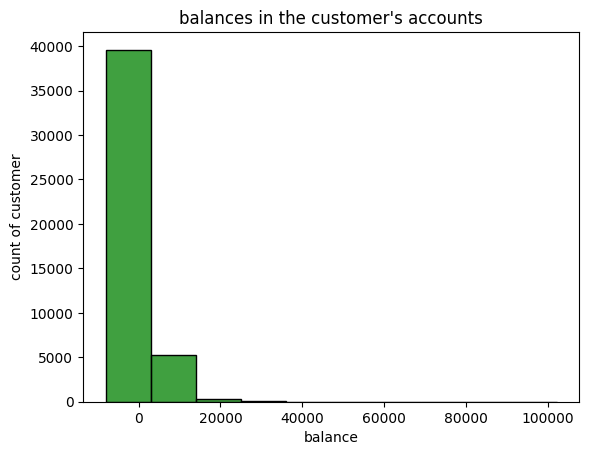

In [12]:
balancs = sns.histplot(x=data['balance'], bins=10, color='green')
plt.title('balances in the customer\'s accounts')
plt.xlabel("balance")
plt.ylabel("count of customer")

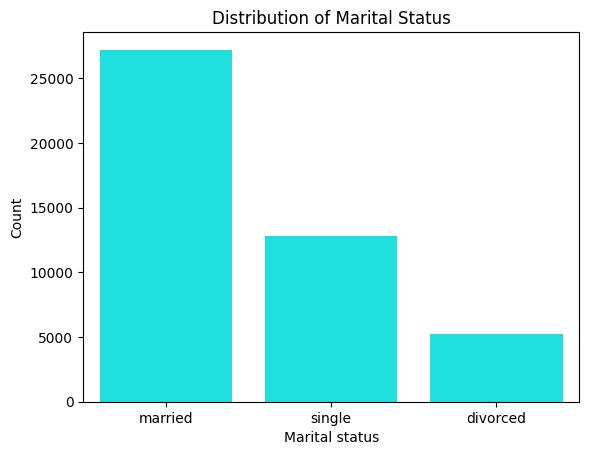

In [13]:
sns.countplot(x=data['marital'], color='cyan')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.show()

Text(0.5, 1.0, 'Job')

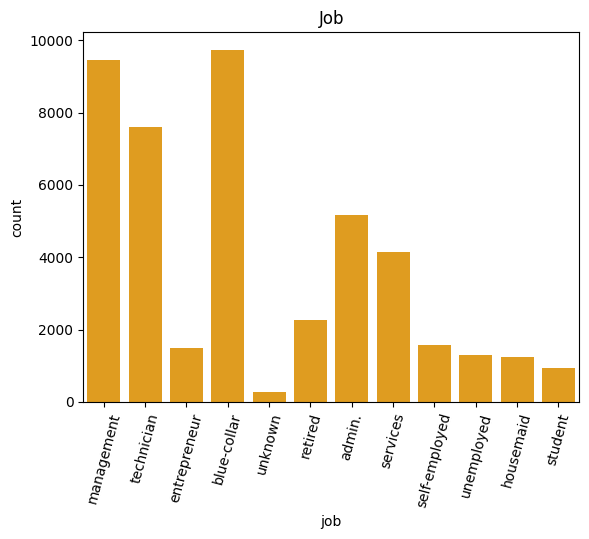

In [14]:
sns.countplot(x=data['job'], color='orange')
plt.xticks(rotation=75)
plt.title('Job')

<Axes: xlabel='age', ylabel='Count'>

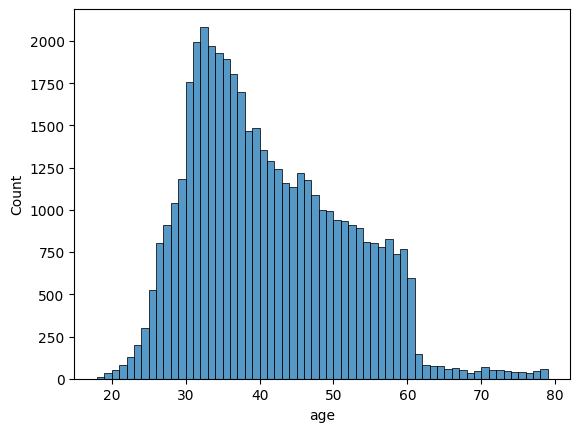

In [15]:
sns.histplot(data['age'], bins=range(18, 80), kde=False)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [17]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [27]:
transform = LabelEncoder()
marital = transform.fit_transform(data['marital'])
marital = pd.DataFrame(marital, columns=['marital'])
data['marital'] = marital

In [28]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,2,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,1,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,1,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,2,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [29]:
education = transform.fit_transform(data['education'])
default = transform.fit_transform(data['default'])
housing_d = transform.fit_transform(data['housing'])
loan = transform.fit_transform(data['loan'])
contact_d = transform.fit_transform(data['contact'])

In [38]:
data['education'] = education
data['default'] = default
data['housing'] = housing_d
data['loan'] = loan
data['contact'] = contact_d


data['month'] = transform.fit_transform(data['month'])

In [44]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,44,technician,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,33,entrepreneur,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,47,blue-collar,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,33,unknown,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


In [48]:
x = data.drop(columns=['job', 'poutcome', 'y'])
y = data.iloc[:, -1:]

transform_y = LabelEncoder()
y = transform_y.fit_transform(y)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 1, 0, 0])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [53]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_pred = logistic_regression.predict(x_test)

In [62]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9950
           1       0.57      0.18      0.27      1353

    accuracy                           0.89     11303
   macro avg       0.74      0.58      0.60     11303
weighted avg       0.86      0.89      0.86     11303



In [68]:
logistic_regression_score = logistic_regression.score(x_test, y_test)

# K N neighbors

In [ ]:
scores = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    scores.append(score)
    

Text(0.5, 1.0, 'KNN Score')

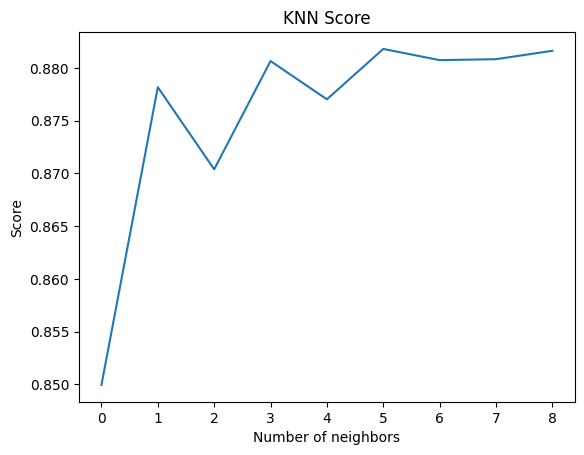

In [82]:
plt.plot(scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.title('KNN Score')

In [83]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [99]:
knn_score = knn.score(x_test, y_test)

In [85]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)


RandomForestClassifier()

In [101]:
random_forest_score = random_forest.score(x_test, y_test)

# Build CNN classification

In [88]:
from keras import layers, callbacks, models, optimizers, losses

In [96]:
model_cnn = models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
call_back = callbacks.EarlyStopping(monitor='accuracy', min_delta=0.88, patience=1)
model_cnn.compile(optimizer=optimizers.Adam(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
model_cnn.fit(x_train, y_train, epochs=15, validation_split=0.2, callbacks=[call_back])

Epoch 1/15


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


837/848 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8835

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


848/848 [==============================] - 2s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8838 - val_loss: 0.0000e+00 - val_accuracy: 0.8831
Epoch 2/15
848/848 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8841 - val_loss: 0.0000e+00 - val_accuracy: 0.8831


In [104]:
cnn_score = model_cnn.evaluate(x_test, y_test)
cnn_score

354/354 [==============================] - 0s 853us/step - loss: 0.0000e+00 - accuracy: 0.8803


[0.0, 0.8802972435951233]

C:\Users\User\AppData\Local\Temp\ipykernel_3316\1321456263.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=lst_scores, x=lst_labels, palette=['#ffc2d1', '#ffb3c6', '#fb6f92', '#f72585'])


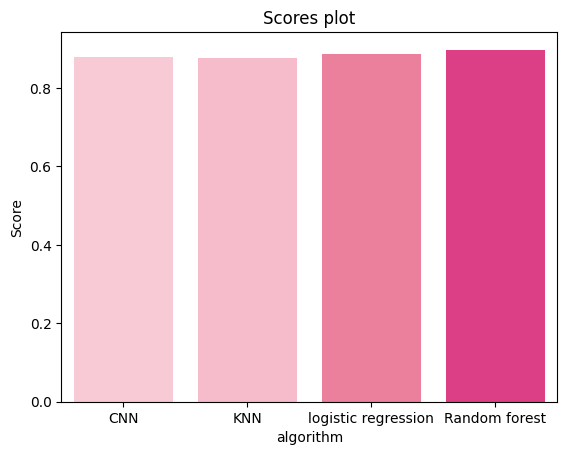

In [114]:
lst_scores = [cnn_score[1], knn_score, logistic_regression_score, random_forest_score]
lst_labels = ['CNN', 'KNN', 'logistic regression', 'Random forest']

sns.barplot(y=lst_scores, x=lst_labels, palette=['#ffc2d1', '#ffb3c6', '#fb6f92', '#f72585'])
plt.xlabel('algorithm')
plt.ylabel('Score')
plt.title('Scores plot')
plt.show()